# Import

In [1]:

%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm import tqdm_notebook as tqdm

import time
import os
import sys
sys.path.append('/home/xilinx/jupyter_notebooks/')
sys.path.append('C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts')
import scipy as sp
import json
from scipy.fft import fft, fftfreq

from slab.instruments import *
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict
from slab import Experiment, dsfit, AttrDict

# Figure params
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 14})

Warning serial library import failed.
Could not load InstrumentManagerWindow
Could not import QickInstrument, try install qick package
Could not load AD5780 dac 
Could not load labbrick
Could not load Autonics TM4 Driver


In [2]:
from slab.dsfit import *
import os
from scipy.interpolate import griddata
from numpy import mgrid, array, zeros,abs,pi,cos,transpose, linspace
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from tempfile import TemporaryFile
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
import json
from h5py import File
from datetime import datetime
import time
from slab.datamanagement import SlabFile
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from slab.dsfit import *
from scipy.optimize import curve_fit
# import experiments.fitting as fitter
from matplotlib.colors import Normalize

# Function used in experiment

In [3]:
import sys

# Path to add
expts_path = 'C:\\_Lib\\python\\multimode_expts'

# Add the path to the system path at the highest priority
if expts_path not in sys.path:
    sys.path.insert(0, expts_path)
    print('Path added at highest priority')

# Verify the path is added
print(sys.path)


Path added at highest priority
['C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python', 'C:\\_Lib\\python\\slab', 'C:\\_Lib\\python\\qick\\qick_lib', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'c:\\Users\\26049\\.conda\\envs\\slab\\python38.zip', 'c:\\Users\\26049\\.conda\\envs\\slab\\DLLs', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab', '', 'C:\\Users\\26049\\AppData\\Roaming\\Python\\Python38\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\easy_lmfit-1.0-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\attrdict-2.0.1-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\Pythonwin', '/home/xilinx/jupyter_notebooks

In [4]:
from multimode_expts.fit_display import *

importing from path  C:\_Lib\python\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\_Lib\python\multimode_expts\experiments\qsim
imported experiments.qsim.floquet_general
imported experiments.qsim.qsim_experiments
imported experiments.qsim.sideband_ramsey
imported experiments.qsim.utils
importing from path  C:\_Lib\python\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_cavity.ecd_read_spec
imported experiments.qubit_cavity.non_demolution_readout
imported experiments.qubit_cavity.out_and_back
imported experiments.qubit_cavity.photo_resolved_pulse_probe
imported experiments.qubit_cavity.qubit_cavity_opt
impor

In [5]:
import experiments.fitting as fitter
from numpy.linalg import inv

# Experiment data file path

In [6]:

# print("path: ", path)

"""Reopen saved data"""
def prev_data(expt_path, filename):
    temp_data_file = expt_path+'\\'+filename
    with SlabFile(temp_data_file) as a:
        attrs = dict()
        for key in list(a.attrs):
            attrs.update({key:json.loads(a.attrs[key])})
        keys = list(a)
        temp_data = dict()
        for key in keys:
            temp_data.update({key:np.array(a[key])})
        # print(f'Extracted data and attrs {list(a.attrs)}')
    return temp_data, attrs
data_parent =  r'H:\Shared drives\SLab\Multimode\experiment\250505_craqm'
# data_parent_old = r'H:\Shared drives\SLab\Multimode\experiment\240911'
expt_path=data_parent+'\\data'
# expt_path_old=data_parent_old+'\\data'
print('Data are extracted from', expt_path)

Data are extracted from H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data


# Dataset

In [7]:
from dataset import *
from dataset import storage_man_swap_dataset
import os 

file_path = os.path.join(expts_path, 'man1_storage_swap_dataset.csv')
# print(os.makedirs(file_path, exist_ok=True))
ds = storage_man_swap_dataset(file_path)

In [8]:
ds.df

,stor_name,freq (MHz),precision (MHz),pi (mus),h_pi (mus),gain (DAC units),last_update
0,M1-S1,349.110,NaN,0.972701,0.487842,3000,2025-05-23 13:48:55.745817
1,M1-S2,520.610,NaN,0.165878,0.080903,5000,2025-05-22 15:50:43.604290
2,M1-S3,696.350,NaN,1.122884,0.512333,9000,2025-05-22 15:50:34.895075
3,M1-S4,875.285,NaN,1.068157,0.488362,9000,2025-05-22 15:54:56.582975
4,M1-S5,1053.040,NaN,1.744303,0.833387,7500,2025-05-22 15:55:49.320754
5,M1-S6,1244.860,NaN,1.388454,0.652345,13500,2025-05-22 15:56:51.940958
6,M1-S7,1422.660,NaN,1.993553,0.948300,10000,2025-05-22 15:57:38.027389
7,M1-S8,-1.000,-1.00,-1.000000,-1.000000,-1,51:31.3
8,M1-S9,-1.000,-1.00,-1.000000,-1.000000,-1,51:31.3
9,M1-S10,-1.000,-1.00,-1.000000,-1.000000,-1,51:31.3


In [9]:
list(ds.df['freq (MHz)'][1:7])

[521.23, 696.98, 876.38, 1053.95, 1245.525, 1423.275]

In [10]:
list(ds.df['gain (DAC units)'][1:7])

[5000, 9000, 9000, 7500, 13500, 13500]

# Actual experiment data

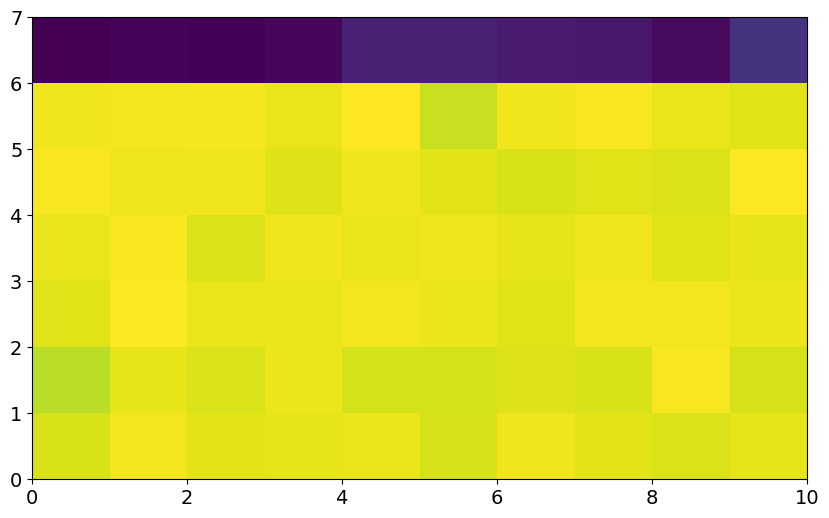

In [9]:
all_amps = []

for id in range(20,30):
    temp_data, attrs = prev_data(expt_path, f'00{id:03d}_storage_sweep.h5')
    all_amps.append(temp_data['amps'])


all_amps = np.array(all_amps)


plt.pcolormesh(all_amps[:,6,:].T, cmap='viridis')


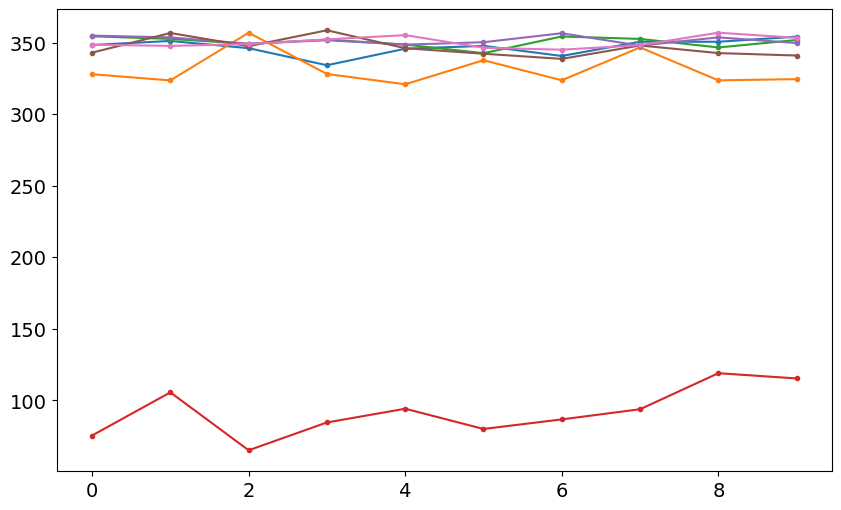

In [21]:
for kk in range(7):
    plt.plot(all_amps[:,3,kk], marker='.')

# Quick viewing

In [9]:
temp_data, attrs = prev_data(expt_path, f'00026_sideband_general_sweep.h5')

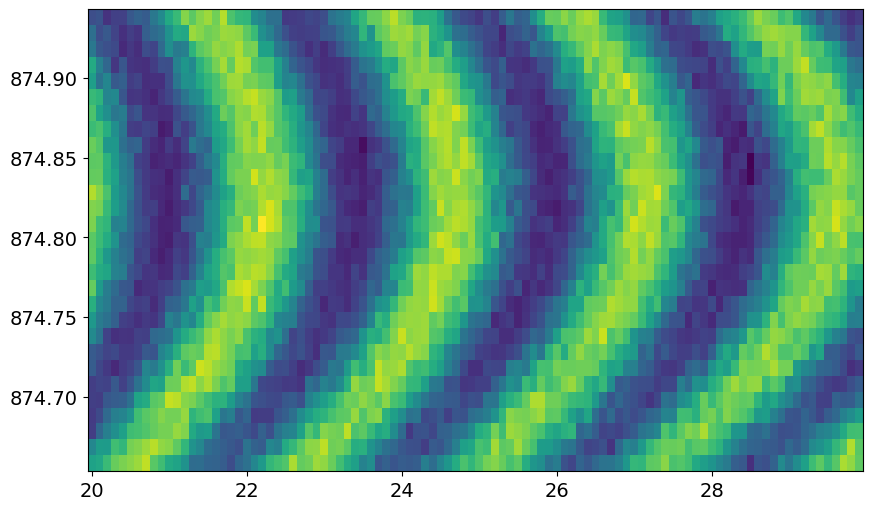

In [11]:
plt.pcolormesh(temp_data['xpts'], temp_data['freq_sweep'], temp_data['avgi'])

## debug fitting

In [9]:
from multimode_expts.fit_display_classes import ChevronFitting

In [10]:
temp_data, attrs = prev_data(expt_path, f'00032_sideband_general_sweep.h5')

In [11]:
chevron_analysis = ChevronFitting(
    frequencies=temp_data['freq_sweep'],
    time=temp_data['xpts'][0],
    response_matrix=temp_data['avgi']
)

chevron_analysis.analyze()
chevron_analysis.display_results(save_fig=False, directory='', title=f'M1-S4_{current_time}')


c:\Users\26049\.conda\envs\slab\lib\site-packages\uncertainties\core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


NameError: name 'current_time' is not defined

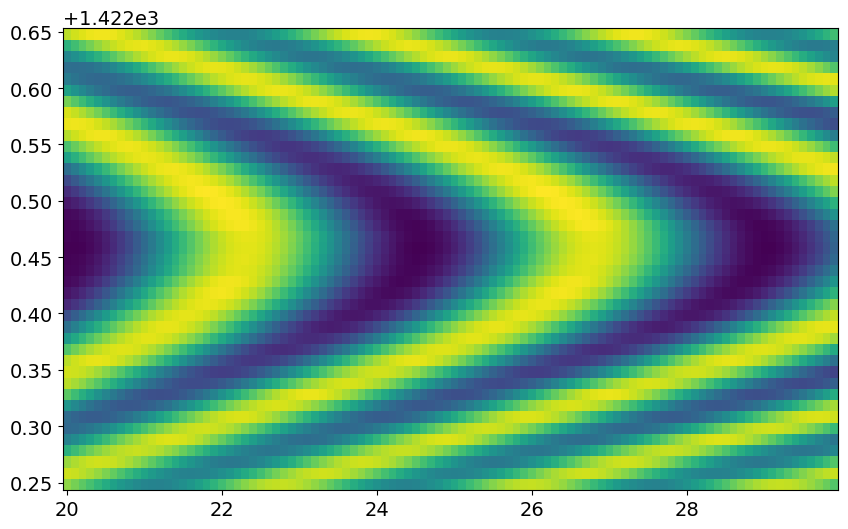

In [12]:
plt.pcolormesh(chevron_analysis.time, chevron_analysis.frequencies, chevron_analysis.best_fits)

1422.4780998731203


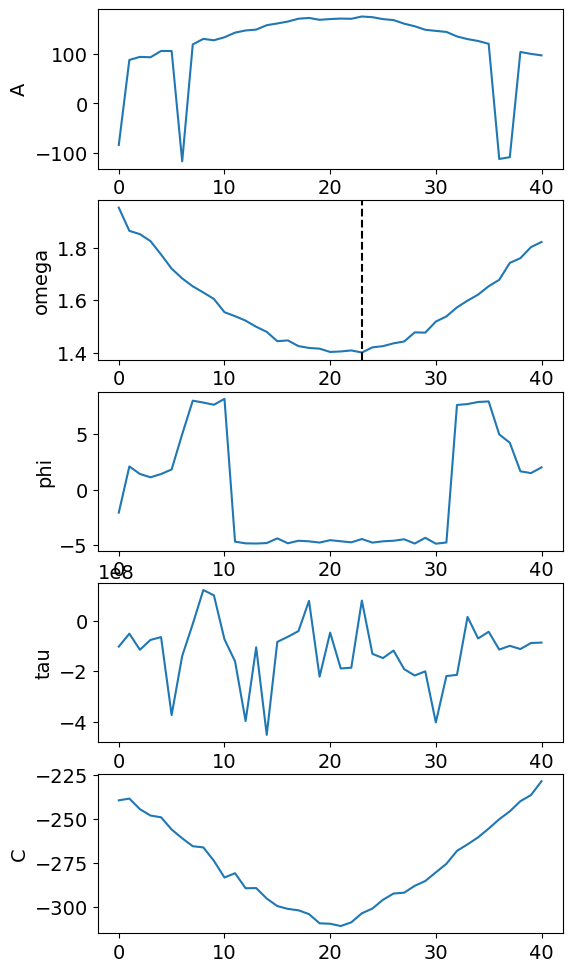

In [13]:
fig, axs = plt.subplots(5,1, figsize=(6,12))

omega_argmin = np.nanargmin([res.best_values['omega'] for res in chevron_analysis.lmfit_results])
print(chevron_analysis.frequencies[omega_argmin])

for key, ax in zip(chevron_analysis.lmfit_results[6].params.keys(), axs):
    ax.plot([res.best_values[key] for res in chevron_analysis.lmfit_results])

    ax.set_ylabel(key)

axs[1].axvline(omega_argmin, color='k', linestyle='--', label='argmin')


1422.4780998731203


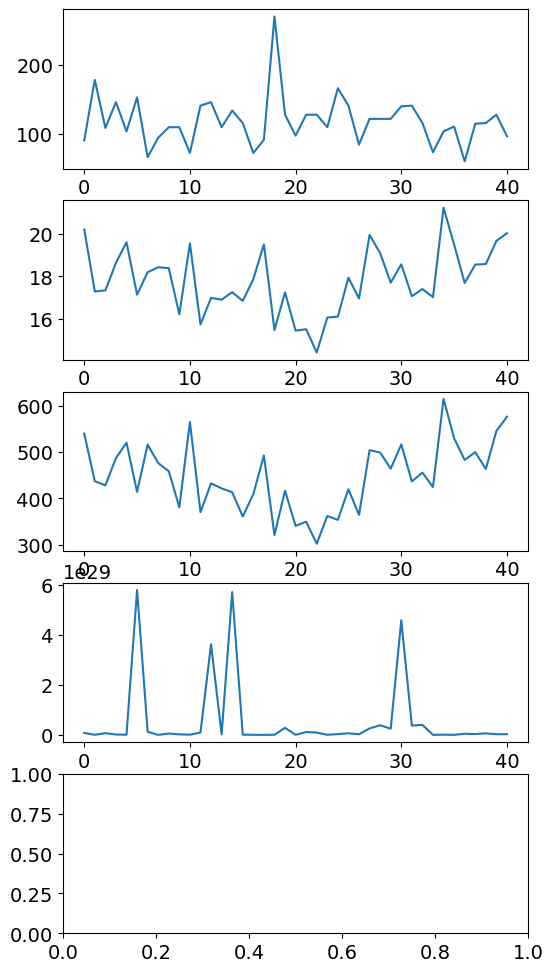

In [14]:
fig, axs = plt.subplots(5,1, figsize=(6,12))

omega_argmin = np.argmin([res.best_values['omega'] for res in chevron_analysis.lmfit_results])
print(chevron_analysis.frequencies[omega_argmin])

axs[0].plot([res.nfev for res in chevron_analysis.lmfit_results])
axs[1].plot([np.mean(res.eval_uncertainty()) for res in chevron_analysis.lmfit_results])
axs[2].plot([res.redchi for res in chevron_analysis.lmfit_results])
axs[3].plot([np.max(res.covar) for res in chevron_analysis.lmfit_results])


# axs[1].axvline(omega_argmin, color='k', linestyle='--', label='argmin')


In [323]:
omega_argmin

6

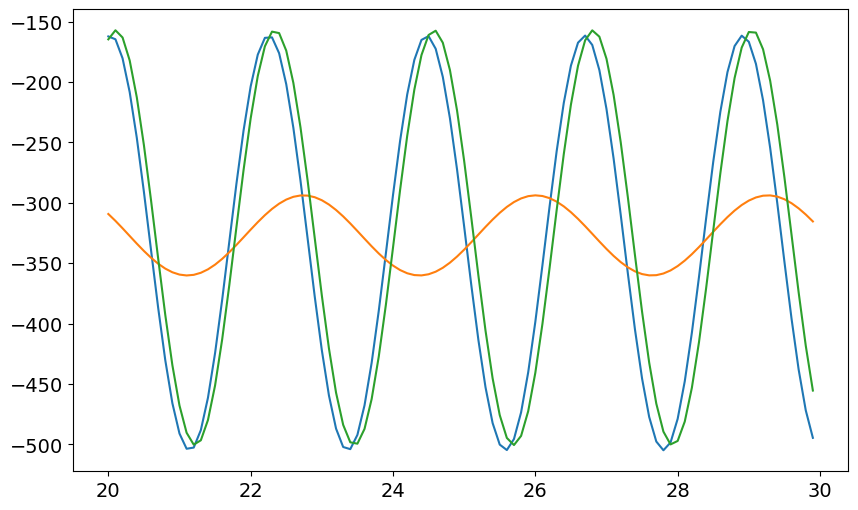

In [325]:
for idx in [5,6,7]:
    plt.plot(chevron_analysis.time, chevron_analysis.best_fits[idx], label=f'{idx}')

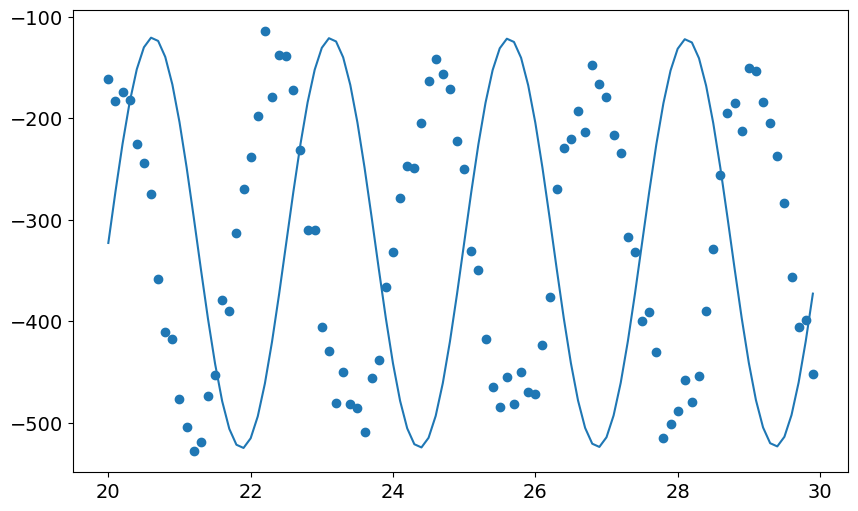

In [333]:
plt.plot(chevron_analysis.time, chevron_analysis.lmfit_results[7].init_fit)
plt.scatter(chevron_analysis.time, chevron_analysis.response_matrix[7])

In [153]:
np.ptp(ydat)

341.37556277056274

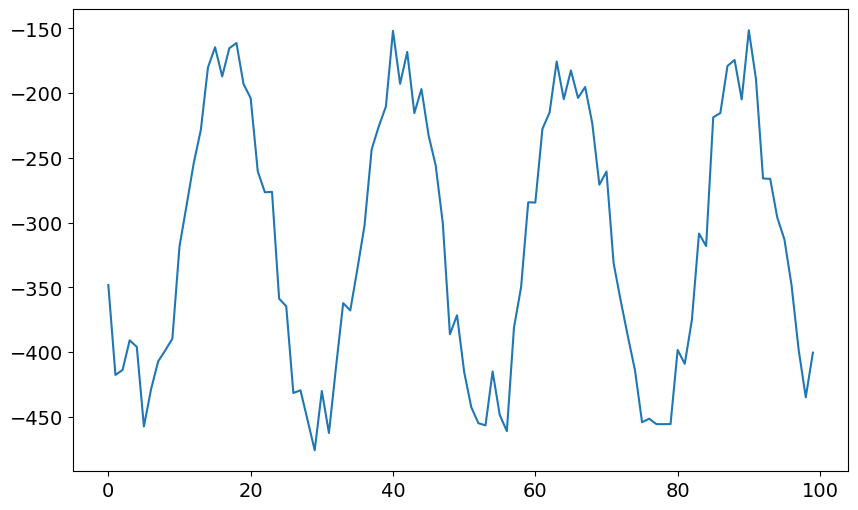

In [127]:
plt.plot(ydat)

In [34]:
current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

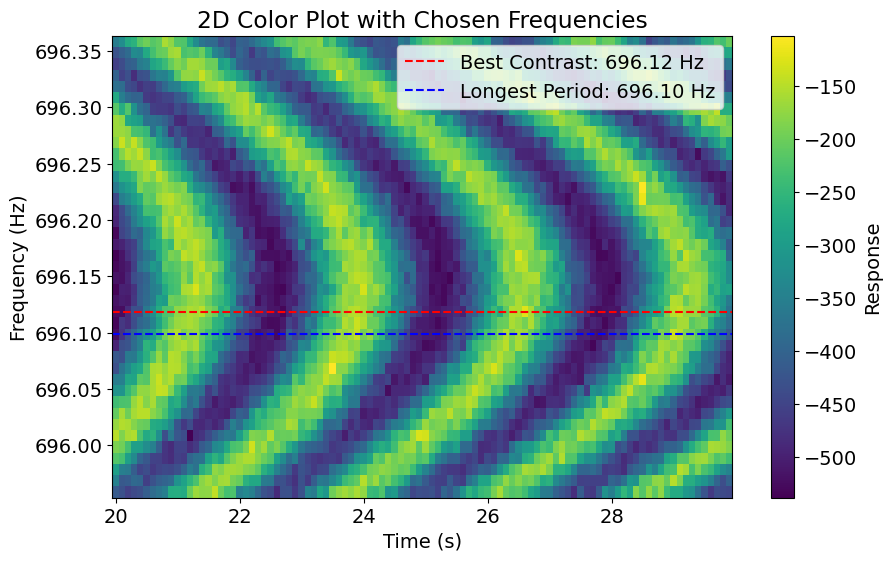

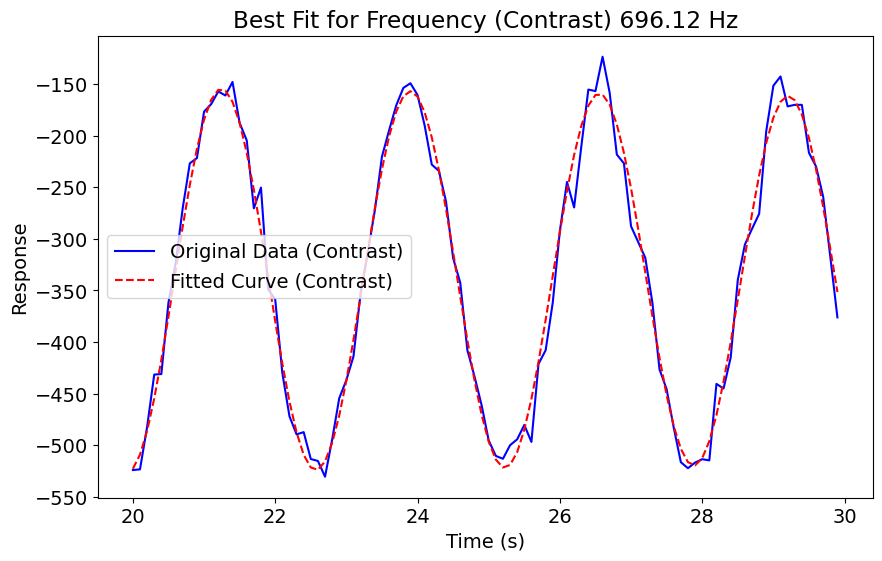

In [35]:
chevron_analysis.display_results(save_fig=False, directory='', title=f'M1-S4_{current_time}')

In [12]:
from multimode_expts.experiments.single_qubit.sideband_general import SidebandGeneralExperiment

In [14]:
sbg = SidebandGeneralExperiment(path=expt_path, config_file='00026_sideband_general_sweep.h5')

In [24]:
sbg.data = sbg.load_data(sbg.datafile())

In [25]:
sbg.analyze()

c:\Users\26049\.conda\envs\slab\lib\site-packages\numpy\fft\helper.py:162: RuntimeWarning: divide by zero encountered in divide
  val = 1.0 / (n * d)


ValueError: operands could not be broadcast together with shapes (30,) (100,) 

# Sideband chevron

In [37]:
temp_data, attrs = prev_data(expt_path, f'00000_SidebandChevron_M1S7.h5')

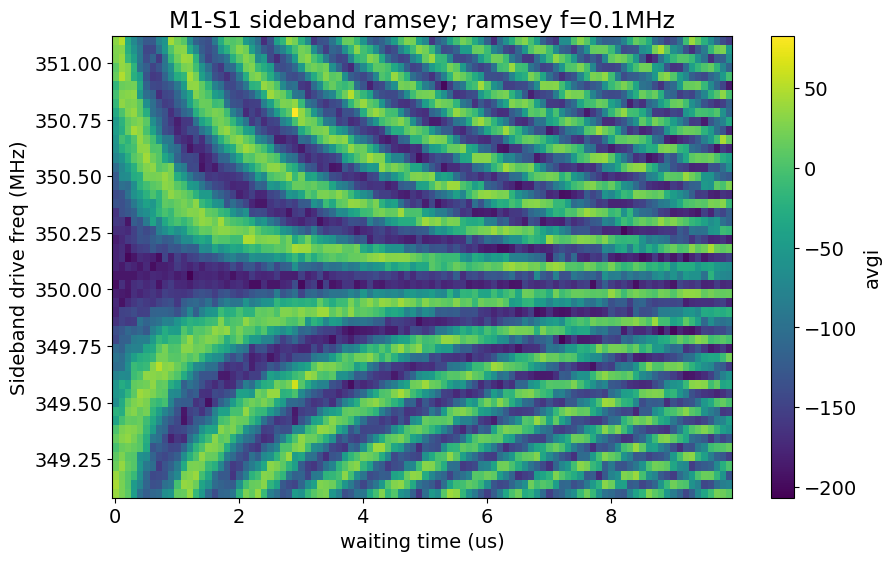

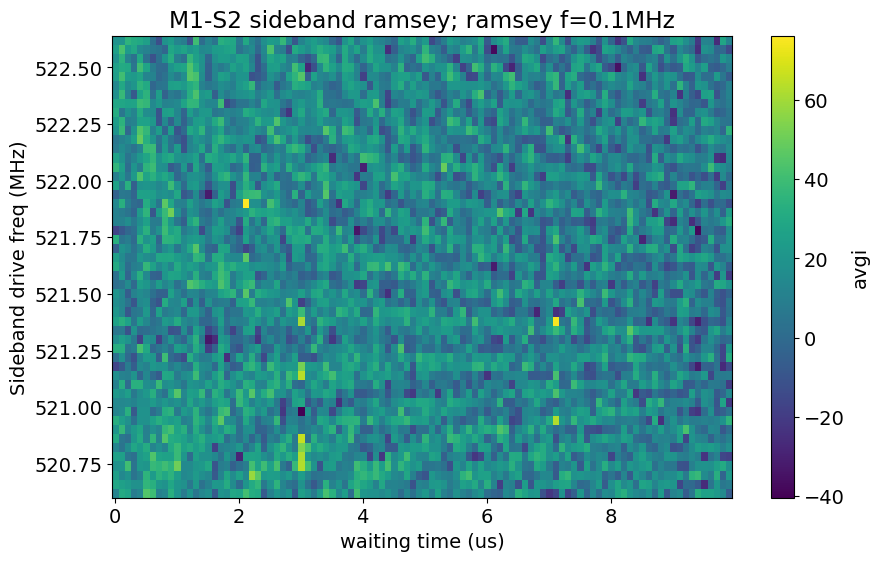

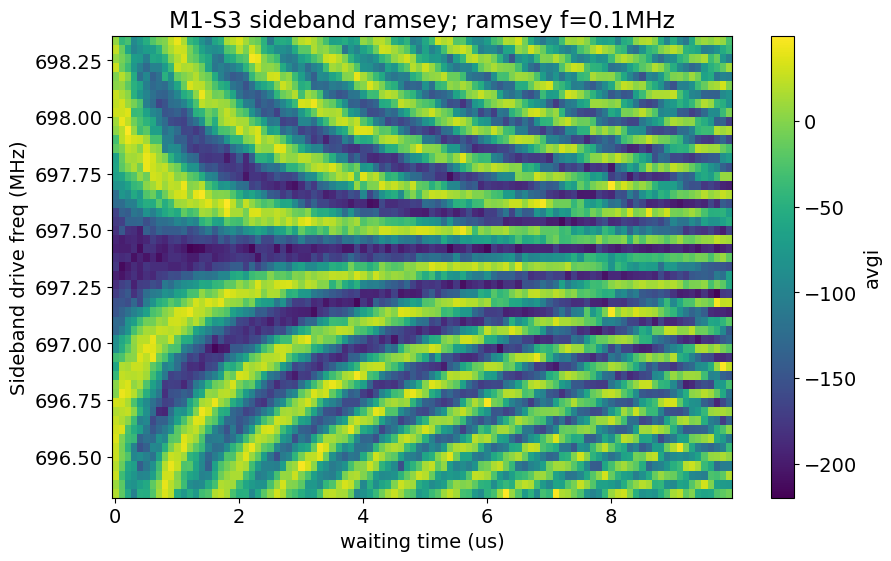

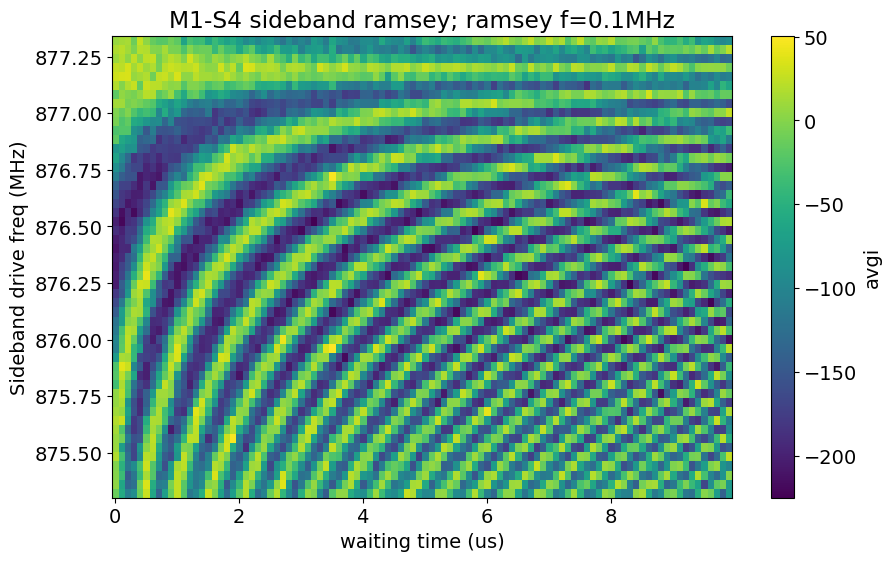

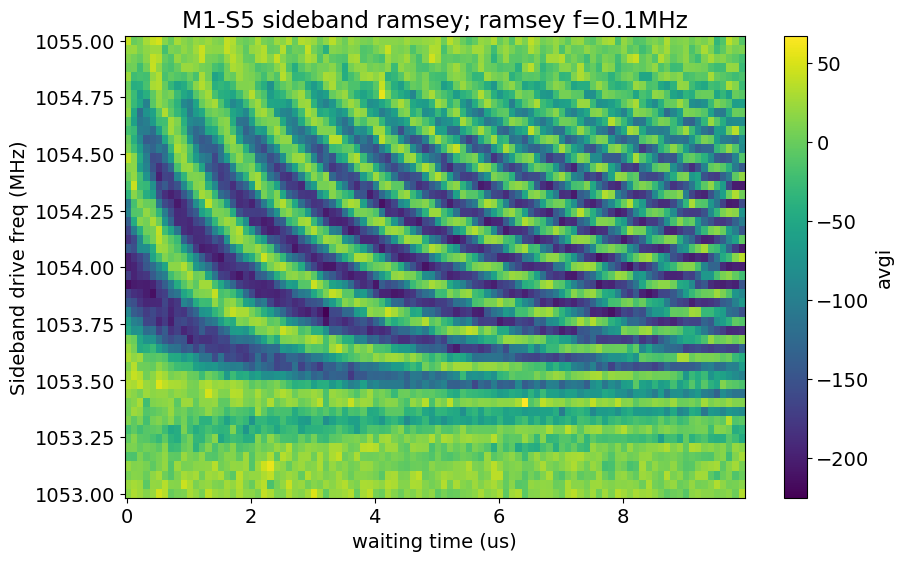

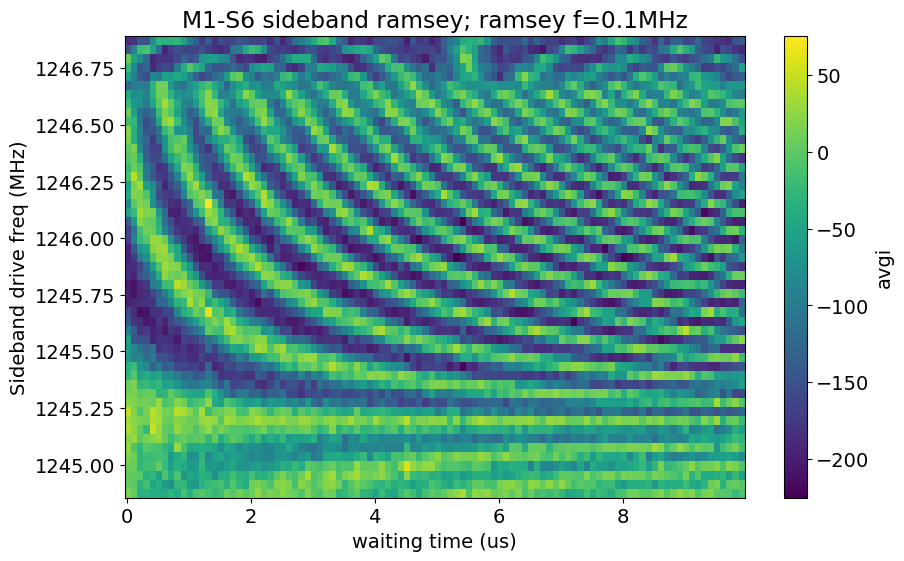

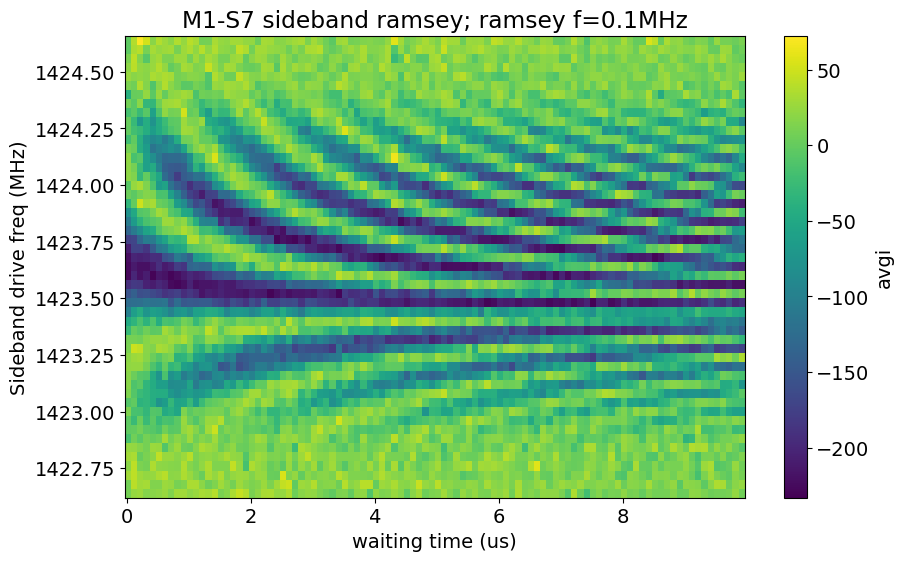

In [39]:
stor_no = 7

for stor_no in range(1,8):
    temp_data, attrs = prev_data(expt_path, f'00000_SidebandChevron_M1S{stor_no}.h5')
    plt.figure()
    plt.pcolormesh(temp_data['xpts'], temp_data['ypts'], temp_data['avgi'])
    plt.colorbar(label='avgi')
    plt.xlabel('waiting time (us)')
    plt.ylabel('Sideband drive freq (MHz)')
    plt.title(f'M1-S{stor_no} sideband ramsey; ramsey f=0.1MHz')